In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv(r"C:\Users\rasgu\OneDrive\Documents\VS Code\ml\datasets\salary.csv")
dataset.head(5)

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


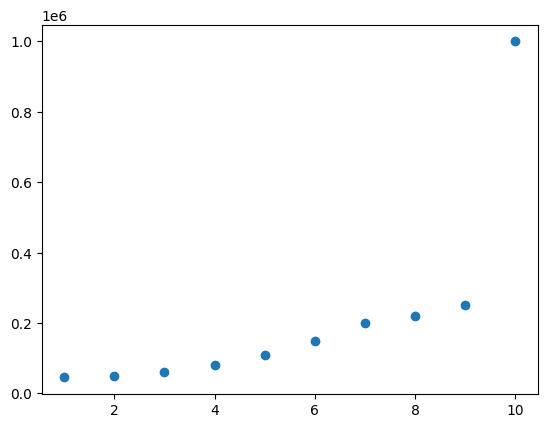

In [46]:
#check polynomial nature of data by making graph
plt.scatter(dataset["Level "],dataset["Salary"])
plt.show() 

In [47]:
dataset.corr()

,Level,Salary
Level,1.00000,0.72064
Salary,0.72064,1.00000


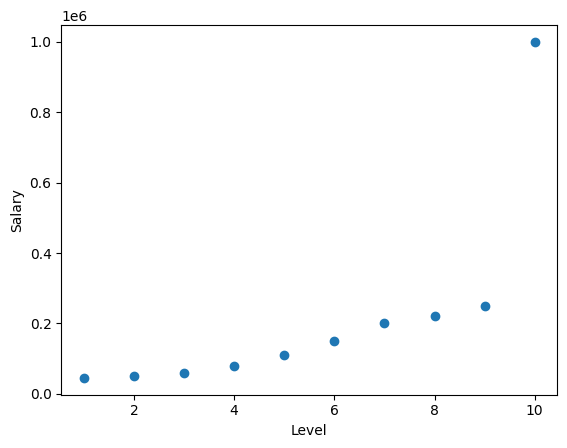

In [48]:
#Y = b0 + b1x1 + b2x1^2 + b3x1^3 +...bnx1^n
#seperate dependent and independent values

plt.scatter(dataset["Level "], dataset["Salary"])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [ ]:
#BLOCK
x=dataset[["Level "]] #this should be 2d
y=dataset["Salary"]
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=8)
pf.fit(x)
x= pf.transform(x)

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)
#x_train and y_train = input and output used to train the model.
#x_test and y_test = input and output used to evaluate (test) the model.

In [95]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [105]:
lr.score(x_test, y_test)
#change degree if score bad but make sure it doesnt become over-fit

0.9946781527918168

In [ ]:
#  Bad Train-Test Split (especially if x is sorted)
# If lower "Levels" are in train, and higher ones in test, your model may not generalize.
#from sklearn.utils import shuffle
#x, y = shuffle(x, y, random_state=42)
#then again run from BLOCK


In [99]:
lr.coef_

array([ 5.38573494e-03,  9.36965982e+04,  5.23420397e+04, -1.02288456e+05,
        5.32566426e+04, -1.36013369e+04,  1.87816987e+03, -1.34247847e+02,
        3.89033306e+00])

In [100]:
lr.intercept_

np.float64(-40153.30577489734)

In [97]:
prd=lr.predict(x)

C:\Users\rasgu\AppData\Local\Temp\ipykernel_23488\2327120145.py:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("original","prd")


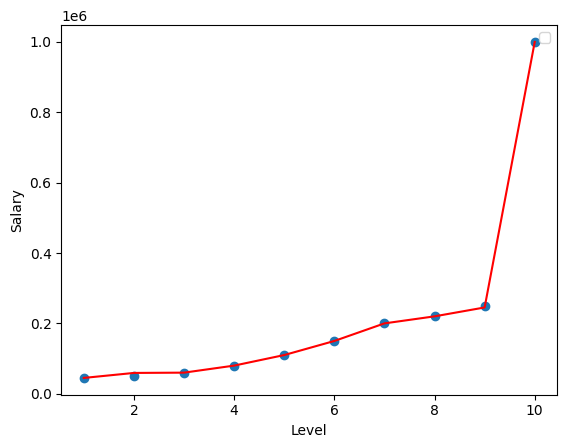

In [98]:
plt.scatter(dataset["Level "],dataset["Salary"])
plt.plot(dataset["Level "], prd, c='red')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend("original","prd")
plt.show()

In [103]:
#deploy
#convert new data into polynomial version first
test=pf.transform([[8]]) #enter value of "Level" in transform function
test

c:\Users\rasgu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.0000000e+00, 8.0000000e+00, 6.4000000e+01, 5.1200000e+02,
        4.0960000e+03, 3.2768000e+04, 2.6214400e+05, 2.0971520e+06,
        1.6777216e+07]])

In [104]:
lr.predict(test)

array([220000.00000072])